In [24]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, BertConfig, BertForSequenceClassification
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding
import matplotlib.pyplot as plt
import copy
from sklearn.model_selection import train_test_split

# Original dataset

In [25]:
file_path = 'Original Data.csv'

try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    
except Exception as e:
    print(f"Error reading the file: {e}")

In [26]:
df.columns = ['label', 'sms']
ham_count = (df['label'] == 'ham').sum()
spam_count = (df['label'] == 'spam').sum()

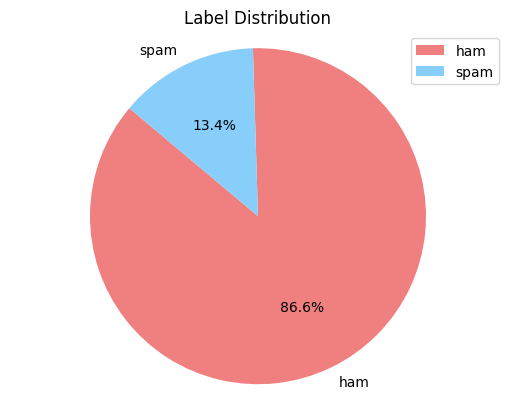

In [27]:
labels = ['ham', 'spam']
sizes = [ham_count, spam_count]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Label Distribution')
plt.legend(labels, loc="best")
plt.show()

In [28]:
raw_train_df, raw_test_df = train_test_split(df, test_size=0.1, random_state=42)
print(raw_test_df.shape)

(558, 2)


In [29]:
test_sms = list(raw_test_df['sms'])
print(len(test_sms))

558


# Dataset after AugGPT

In [30]:
file_path = 'SPAM Data Augmentation.csv'

try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    
except Exception as e:
    print(f"Error reading the file: {e}")

In [31]:
df.columns = ['label', 'sms']
ham_count = (df['label'] == 'ham').sum()
spam_count = (df['label'] == 'spam').sum()

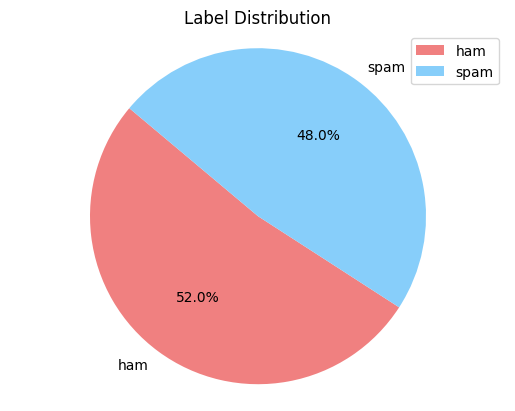

In [32]:
labels = ['ham', 'spam']
sizes = [ham_count, spam_count]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Label Distribution')
plt.legend(labels, loc="best")
plt.show()

In [33]:
index_to_drop = []
for sms in test_sms:
    for index, message in enumerate(df['sms']):
        if sms in message:
            index_to_drop.append(index)
            break
print(index_to_drop)
print(len(index_to_drop))

[7256, 5248, 6587, 5144, 7015, 5259, 6988, 4647, 5454, 6090, 6160, 9155, 58, 6046, 6997, 4882, 7338, 6118, 4782, 6531, 4777, 741, 8719, 4516, 8977, 9074, 8230, 8592, 5037, 9226, 8174, 4787, 9244, 8380, 7562, 138, 8448, 7912, 8787, 4467, 7558, 5484, 272, 9069, 5170, 8159, 359, 7402, 4752, 4579, 7131, 7318, 6064, 7481, 6493, 224, 8544, 439, 4826, 5459, 5930, 7083, 5408, 602, 4720, 43, 438, 509, 2, 8777, 5471, 8939, 6302, 7627, 8541, 9078, 6500, 348, 7983, 8187, 7449, 6383, 8137, 4477, 5541, 8895, 6689, 7507, 5516, 8520, 6744, 7460, 8325, 8514, 7143, 7729, 5335, 7795, 8234, 7398, 5404, 5856, 5348, 6008, 6846, 4699, 5061, 47, 4622, 5591, 5662, 469, 8238, 8905, 6568, 7474, 8950, 5265, 4925, 6979, 6791, 221, 7805, 6898, 5329, 6369, 5141, 4911, 8012, 5388, 4748, 7320, 8548, 6057, 5048, 8045, 6636, 6736, 642, 8793, 4916, 5848, 8526, 5760, 7301, 6497, 6799, 8880, 7330, 7954, 7310, 6228, 332, 6439, 7532, 6187, 8182, 7821, 606, 6, 8995, 7268, 6475, 7744, 8316, 7139, 7033, 7464, 8371, 4521, 6590, 

In [34]:
print(df.loc[4451])
print("-"*20)
idx_to_extend = []
for idx in index_to_drop:
    if idx <= 4451:
        idx_to_extend.append(idx)
print(len(idx_to_extend))

for idx in idx_to_extend:
    index_to_drop.extend([idx + 742 * i for i in range(1, 6)])
print(len(index_to_drop))

label                                                 spam
sms      We've tried to reach you once more. You've bee...
Name: 4451, dtype: object
--------------------
73
903


In [35]:
print('shape of augmented df before drop:',df.shape)
df.drop(index=index_to_drop, inplace=True)
print('shape of augmented df after drop:',df.shape)

shape of augmented df before drop: (9272, 2)
shape of augmented df after drop: (8389, 2)


In [36]:
# Shuffle
df = df.sample(frac=1).reset_index(drop=True)

# Train, val, test split
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)
test_df = copy.deepcopy(raw_test_df)

print("length of train set:", len(train_df))
print("length of validation set:", len(val_df))
print("length of test set:", len(test_df))

length of train set: 7550
length of validation set: 839
length of test set: 558


In [37]:
# output csv
train_df.to_csv('splited_data/train.csv', index=False)
val_df.to_csv('splited_data/validation.csv', index=False)
test_df.to_csv('splited_data/test.csv', index=False)

# Configuration

In [38]:
from datasets import load_dataset, DatasetDict

csv_files_path = {"train": "splited_data/train.csv", "val":"splited_data/validation.csv", "test": "splited_data/test.csv"}
raw_dataset = load_dataset('csv', data_files=csv_files_path, encoding='ISO-8859-1')
print(raw_dataset)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating val split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'sms'],
        num_rows: 7550
    })
    val: Dataset({
        features: ['label', 'sms'],
        num_rows: 839
    })
    test: Dataset({
        features: ['label', 'sms'],
        num_rows: 558
    })
})


In [39]:
# train_test_dataset = raw_dataset['train'].train_test_split(test_size=0.2, seed=42, shuffle=True)
# val_test_dataset = train_test_dataset['test'].train_test_split(test_size=0.5, seed=42, shuffle=True)
# dataset = DatasetDict({
#     'train': train_test_dataset['train'],
#     'val': val_test_dataset['train'],
#     'test': val_test_dataset['test'],
# })
# print(dataset)

In [40]:
label_mapping = {'ham': 0, 'spam': 1}

def map_labels(example):
    example['label'] = label_mapping[example['label']]
    return example

dataset = DatasetDict({
    'train': raw_dataset['train'].map(map_labels),
    'val': raw_dataset['val'].map(map_labels),
    'test': raw_dataset['test'].map(map_labels),
})

Map:   0%|          | 0/7550 [00:00<?, ? examples/s]

Map:   0%|          | 0/839 [00:00<?, ? examples/s]

Map:   0%|          | 0/558 [00:00<?, ? examples/s]

In [41]:
PRETRAINED_MODEL_NAME = "bert-base-cased"
config = BertConfig.from_pretrained(PRETRAINED_MODEL_NAME)

# We can tune hyperparameter here
config.hidden_dropout_prob = 0.1 # default = 0.1
config.labels = 2
config.id2label = {0:'ham',1:'spam'}
config.label2id = {'ham':0,'spam':1}

In [42]:
NUM_LABELS = 2
model = BertForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path = PRETRAINED_MODEL_NAME,
    config = config,
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [43]:
tokenizer = AutoTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

In [44]:
def tokenization(example):
    new_exp = example['sms']
    return tokenizer(new_exp, padding=True, truncation=True)

tokenized_dataset = dataset.map(tokenization, batched=True, remove_columns=['sms'])
print(tokenized_dataset)

Map:   0%|          | 0/7550 [00:00<?, ? examples/s]

Map:   0%|          | 0/839 [00:00<?, ? examples/s]

Map:   0%|          | 0/558 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 7550
    })
    val: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 839
    })
    test: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 558
    })
})


In [45]:
# setup a data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [47]:
import evaluate

accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels)
    return {**accuracy, **f1}

In [49]:

training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=3,
    save_strategy='epoch',
    evaluation_strategy='epoch',
    load_best_model_at_end=True,
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['val'],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [50]:
import os
os.environ['WANDB_DISABLED'] = 'true'

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [51]:
trainer.evaluate(tokenized_dataset['test'])

/home/rex1203rex/anaconda3/envs/IR311/lib/python3.11/site-packages/torch/nn/parallel/data_parallel.py:33: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 1 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


/home/rex1203rex/anaconda3/envs/IR311/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 0.4253295660018921,
 'eval_accuracy': 0.8691756272401434,
 'eval_f1': 0.0,
 'eval_runtime': 8.1075,
 'eval_samples_per_second': 68.825,
 'eval_steps_per_second': 4.317}

In [52]:
trainer.train()
trainer.save_model('model')

/home/rex1203rex/anaconda3/envs/IR311/lib/python3.11/site-packages/torch/nn/parallel/data_parallel.py:33: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 1 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))
/home/rex1203rex/anaconda3/envs/IR311/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss
